In [5]:
!pip install IPython
from IPython.display import Image


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


# 1 일단 간단히~

## 1.1 AND 연산 데이터를 가지고 

In [8]:
import numpy as np

X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

D = np.array([[0], [0], [0], [1]])

## 1.2 sigmoid 정의하고

In [9]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

## 1.3 순방향 연산 함수

In [10]:
def calc_output(W, x):
    v = np.matmul(W, x)
    y = sigmoid(v)

    return y

## 1.4 여기서 에러를 이용한 기울기를 계산하는 함수

In [11]:
def calc_error(d, y):
    e = d - y
    delta = y*(1-y)*e

    return delta

-  sigmoid의 미분은 sigmoid * (1 - sigmoid)

## 1.5 그리고 그레디언트 디센트를 계산하는 함수

In [12]:
def delta_GD(W, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]

        y = calc_output(W, x)
        delta = calc_error(d, y)
        
        dW = alpha*delta*x
        W = W + dW

    return W, delta

## 1.6 학습해라~~~~

In [13]:
W = 2*np.random.random((1, 3)) - 1
alpha = 0.9

hist_W = []
hist_loss = []

for epoch in range(1000):
    W, delta = delta_GD(W, X, D, alpha)

    hist_loss.append(delta)
    hist_W.append(W)

    if epoch % 100 == 0:
        print(W)

[[-0.93093674  0.98579935  0.30825449]]
[[ 2.59935306  2.56845322 -3.9362711 ]]
[[ 3.44346162  3.42426108 -5.22524147]]
[[ 3.94349466  3.93065059 -5.98561393]]
[[ 4.29526913  4.28573855 -6.51843205]]
[[ 4.5651461   4.55760833 -6.92622036]]
[[ 4.7833868   4.77716982 -7.25546766]]
[[ 4.9662239   4.96094297 -7.53100219]]
[[ 5.123336    5.11875148 -7.76758025]]
[[ 5.26094188  5.25689487 -7.97466049]]


## 1.7 학습할 때 가중치의 변화 모습

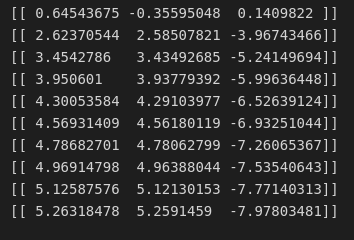

In [14]:
Image("46.png")

## 1.8 epoch당 loss의 변화

## 1.9 그래프

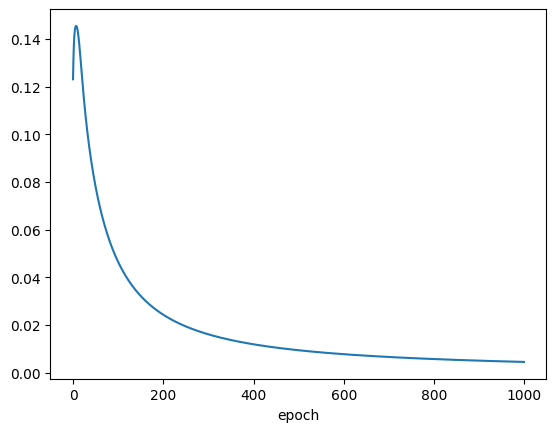

In [16]:
import matplotlib.pyplot as plt

plt.plot(hist_loss)
plt.xlabel('epoch')
plt.show()

## 1.10 가중치의 변화~

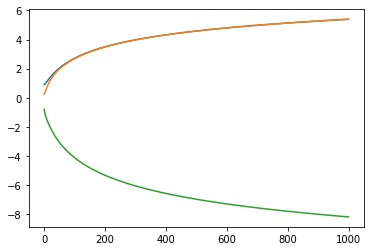

In [8]:
plt.plot(np.array(hist_W).reshape(-1, 3));

## 1.11 추론? 잘되지~

In [9]:
N = 4
for k in range(N):
    x = X[k, :].T
    y = calc_output(W, x)

    print(y)

[0.00028163]
[0.05817706]
[0.05837382]
[0.9314743]


# 2 그래프를 이용한 연산

## 2.1 100원짜리 사과를 2개 살건데 소비세가 10%가 붙음

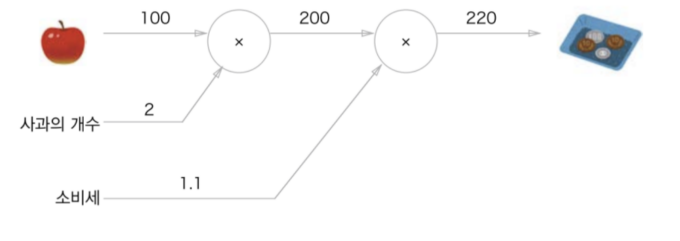

In [18]:
Image("47.png")

## 2.2 추가로 150원짜리 귤을 3개 삼

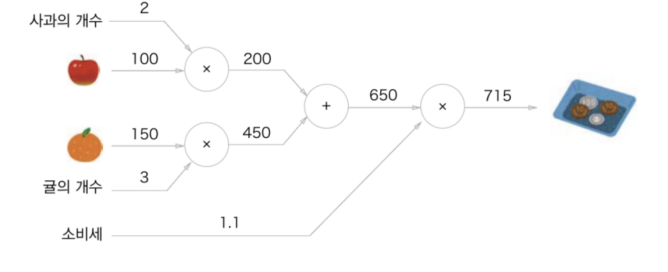

In [19]:
Image("48.png")

## 2.3 그래프를 이용해서 계산하면 확장이 용이함

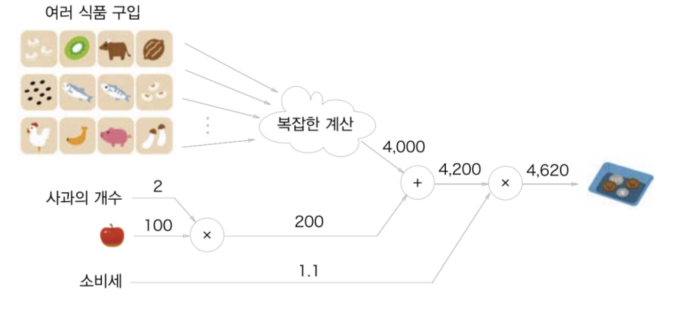

In [20]:
Image("49.png")

## 2.4 다시 여기서 사과가 1원 오르면 전체 가격은 얼마가 오를까?

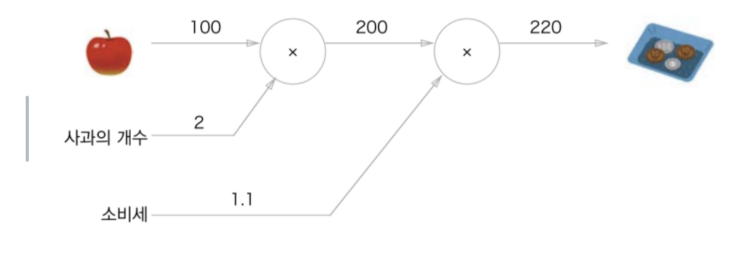

In [21]:
Image("50.png")

## 2.5 그걸 이렇게 볼 수 있는것이 “역전파” - Backpropagation

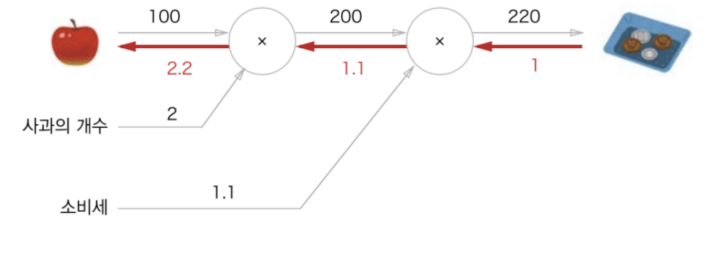

In [22]:
Image("51.png")

## 2.6 실제 역전파는 한 그래프에서 보면

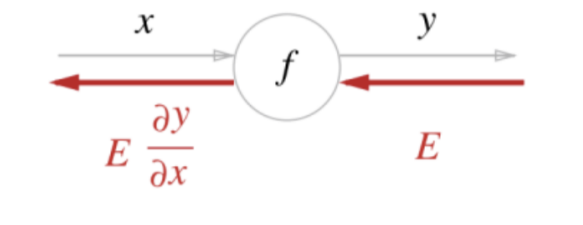

In [23]:
Image("52.png")

## 2.7 이 함수는

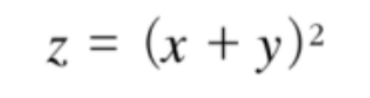

In [24]:
Image("53.png")

## 2.8 이렇게 두 함수로 표현할 수 있고

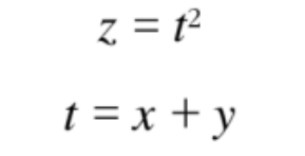

In [25]:
Image("54.png")

## 2.9 원 함수의 편미분을 구하고 싶다면

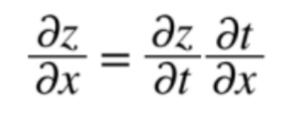

In [26]:
Image("55.png")

## 2.10 각각을 편미분해서

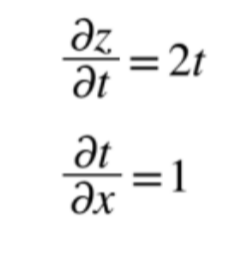

In [27]:
Image("56.png")

## 2.11 이렇게 표현할 수 있음 - 연쇄법칙

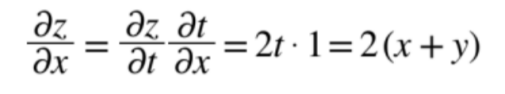

In [28]:
Image("57.png")

## 2.12 이걸 그래프로 표현하면

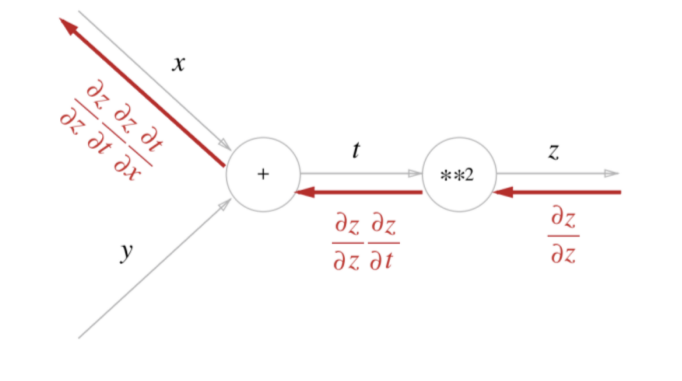

In [29]:
Image("58.png")

## 2.13 그래서 이렇게

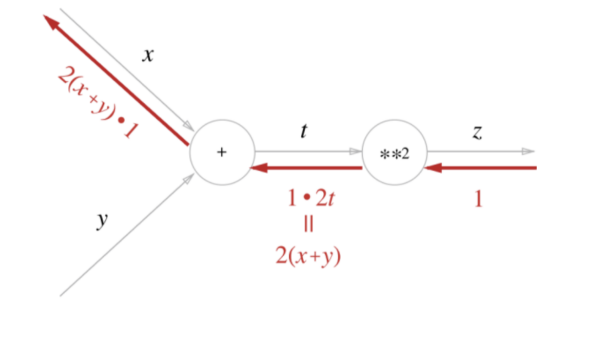

In [30]:
Image("59.png")

# 3 XOR

## 3.1 XOR를 풀기 위한 딥러닝 구조

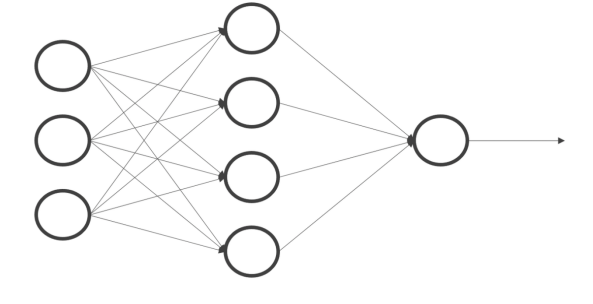

In [31]:
Image("60.png")

## 3.2 output 계산 함수

In [32]:
def calc_output(W1, W2, x):
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)

    return y, y1

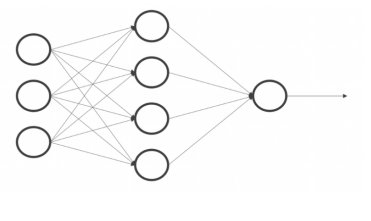

In [33]:
Image("61.png")

- 포워드 연산


## 3.3 출력층 델타 함수

In [34]:
def calc_delta(d, y):
    e = d - y
    delta = y*(1-y) * e

    return delta

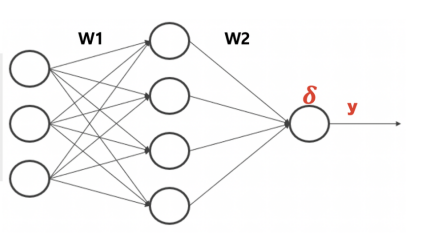

In [35]:
Image("62.png")

## 3.4 은닉층 델타 함수

In [36]:
def calc_delta1(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1*(1-y1) * e1

    return delta1

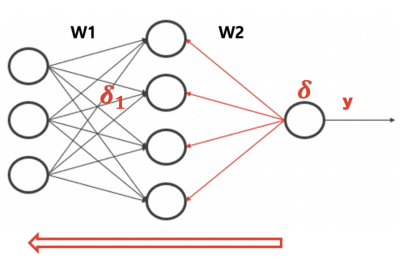

In [37]:
Image("112.png")

## 3.5 역전파 코드

In [38]:
def backprop_XOR(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]

        y, y1 = calc_output(W1, W2, x)
        delta = calc_delta(d, y)
        delta1 = calc_delta1(W2, delta, y1)

        dW1 = (alpha*delta1).reshape(4, 1) * x.reshape(1, 3)
        W1 = W1 + dW1

        dW2 = alpha * delta * y1
        W2 = W2 + dW2

    return W1, W2

## 3.6 데이터랑 가중치 랜덤 준비

In [39]:
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

D = np.array([[0], [1], [1], [0]])

W1 = 2*np.random.random((4, 3)) - 1
W2 = 2*np.random.random((1, 4)) - 1

## 3.7 학습

In [40]:
alpha = 0.9
for epoch in range(10000):
    W1, W2 = backprop_XOR(W1, W2, X, D, alpha)

## 3.8 결과~~~ 이쁘당

In [41]:
N = 4
for k in range(N):
    x = X[k ,:].T
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)

    print(y)

[0.01063185]
[0.98894599]
[0.98972216]
[0.00967178]
